In [5]:
#importing libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


px.set_mapbox_access_token(open("mapbox_token.txt").read())


# Exploratory Data Analysis

In [8]:
#Reading data from csv downloaded from kaggle
df_data = pd.read_csv("sao-paulo-properties-april-2019.csv")
df_data.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [10]:
#Filtering for negotiation type rent only
df_rent = df_data[df_data['Negotiation Type'] == 'rent']

In [22]:
#Checking dtypes
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory usa

In [23]:
#Checking basic statistics
df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Condo'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Toilets'}>,
        <Axes: title={'center': 'Suites'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Elevator'}>],
       [<Axes: title={'center': 'Furnished'}>,
        <Axes: title={'center': 'Swimming Pool'}>,
        <Axes: title={'center': 'New'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

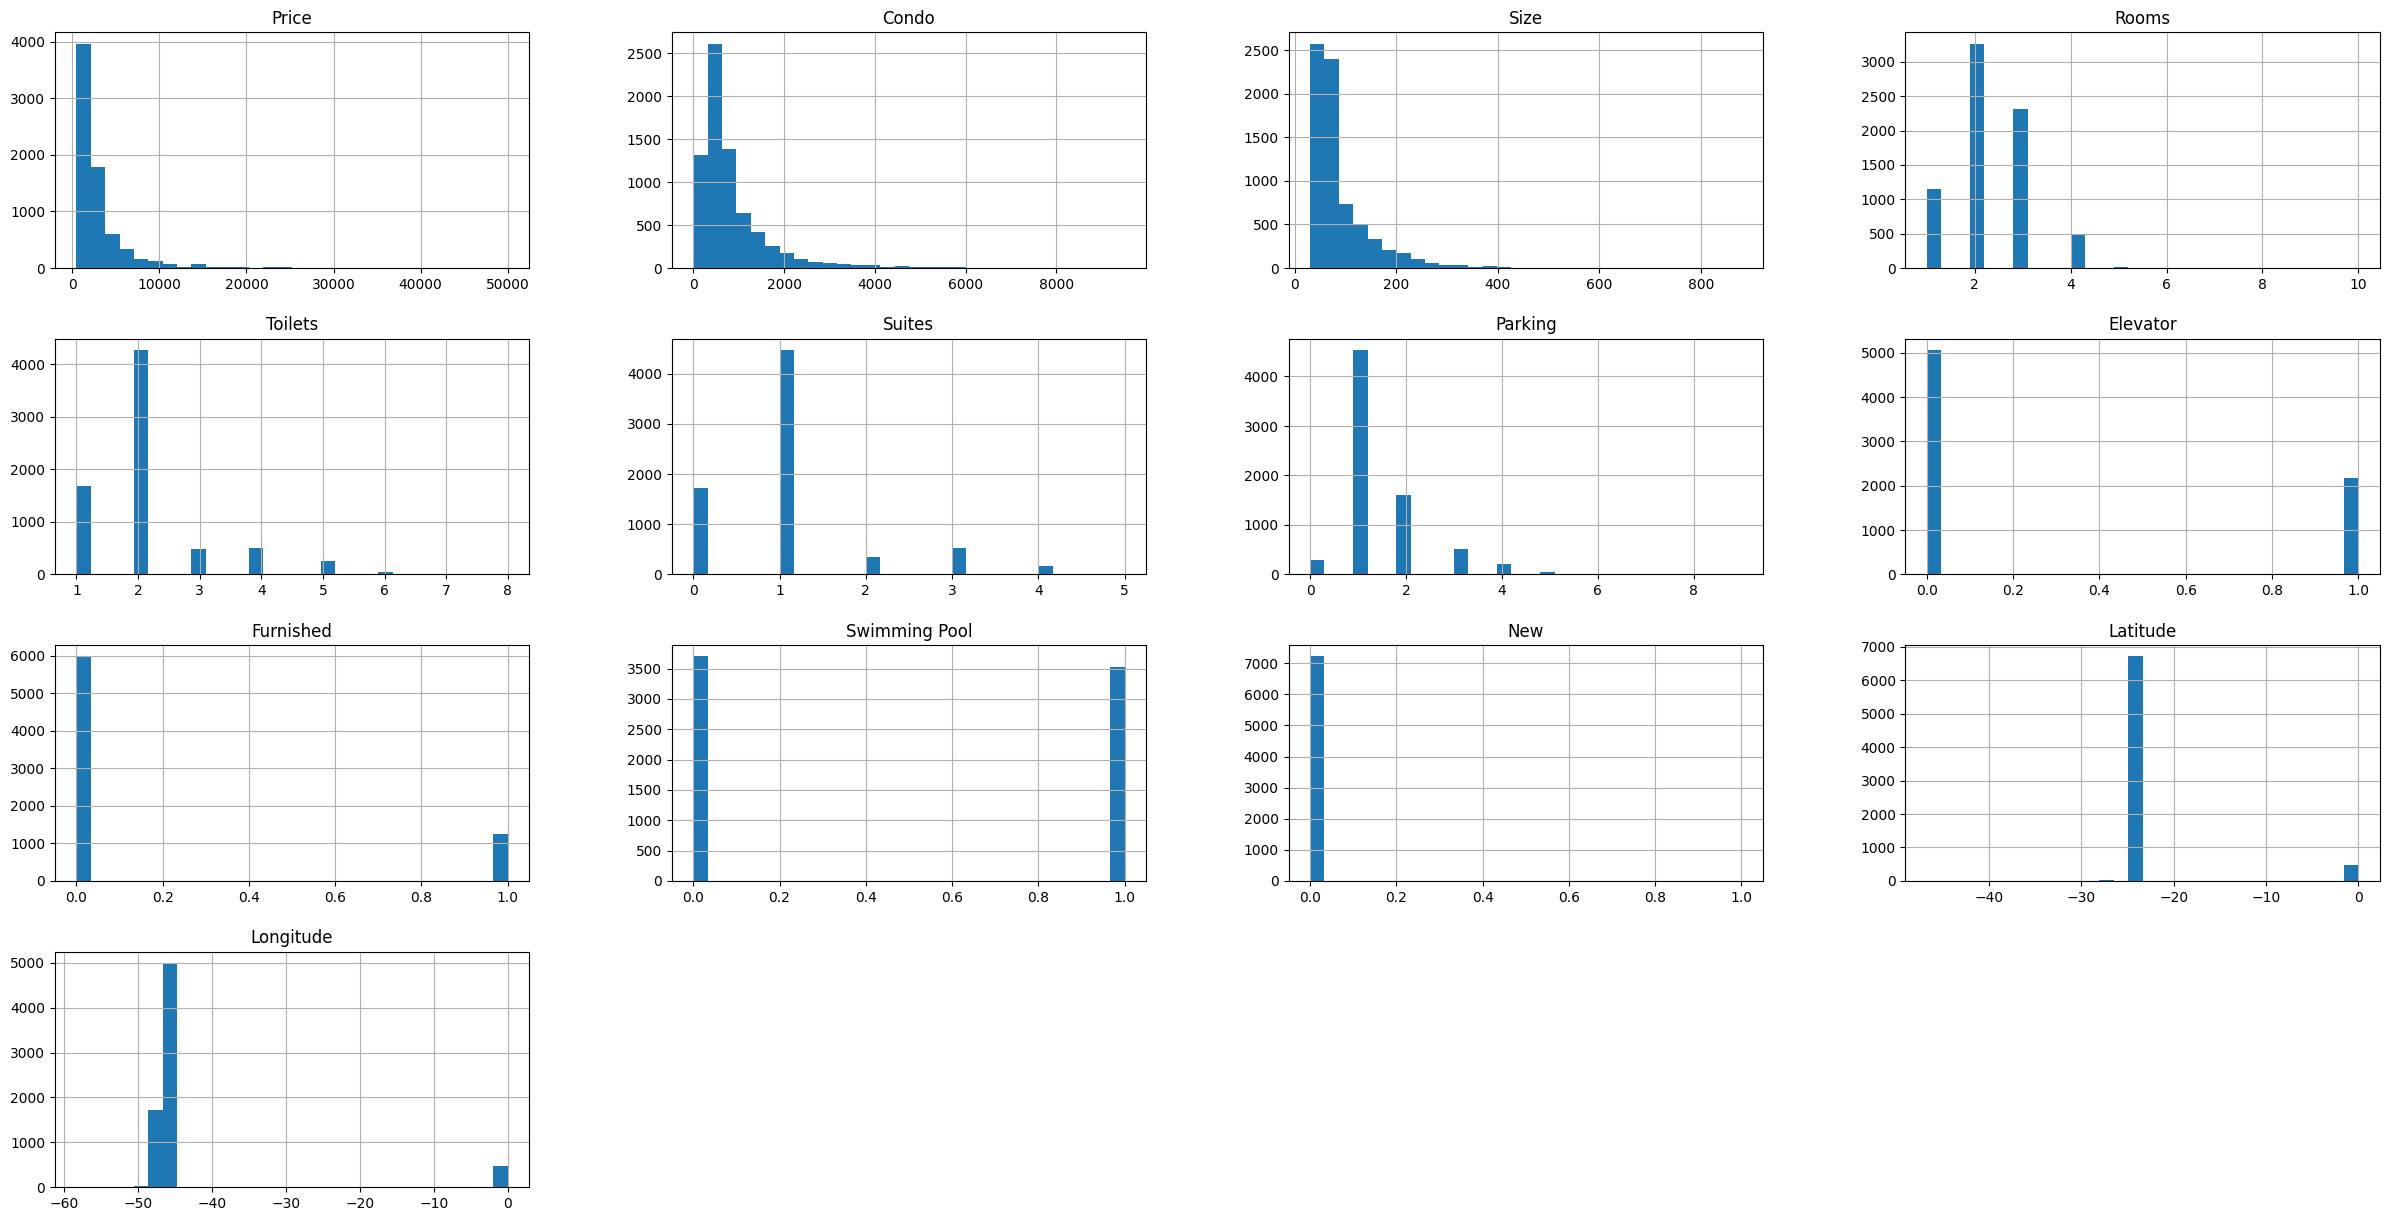

In [24]:
#Plotting histograms
df_rent.hist(bins = 30, figsize = (30,15))

#By looking to this histograms, we can asume that the feature "New" won't help our machine learning model.
#We can also asume that some data has no information on "Latitude" and "Longitude"

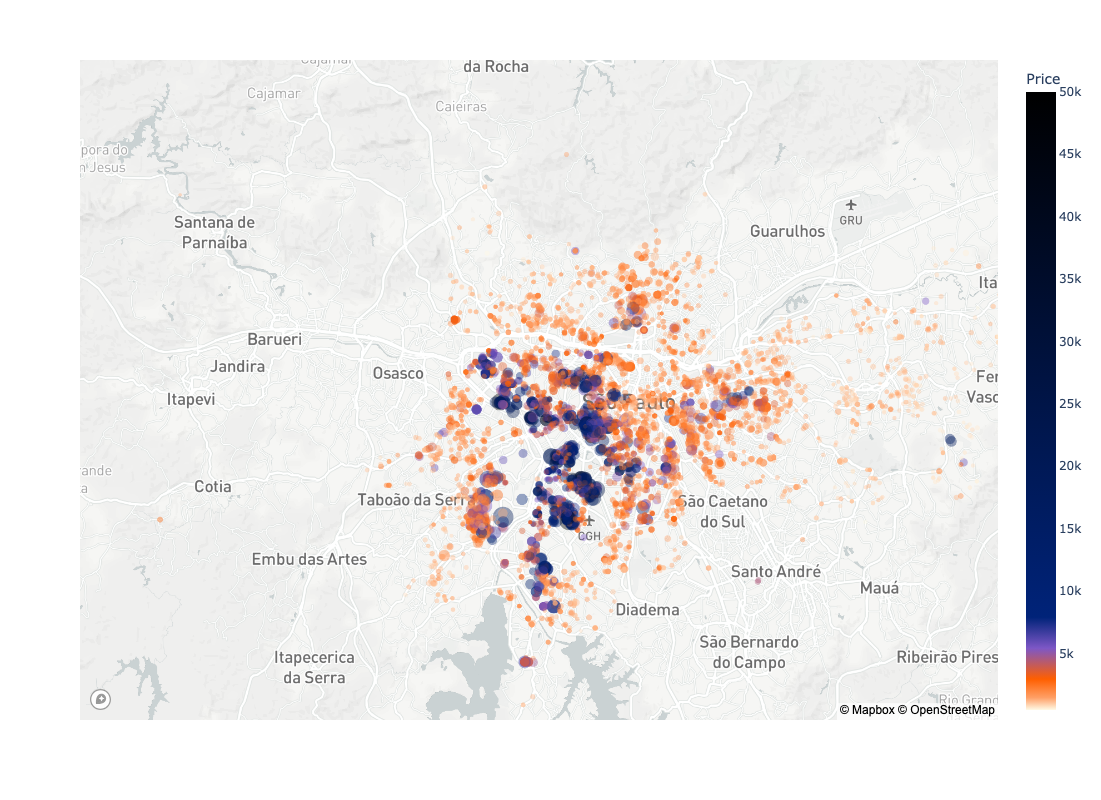

In [21]:
#Plotting city map and adding visual effects.
#Color scale wil be chosen for variable Price and size of the scatter for the size of the property
fig = px.scatter_mapbox(df_rent, lat='Latitude', lon = "Longitude", color = 'Price', size = 'Size', 
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15,zoom=10,opacity=0.4)


fig.update_coloraxes(colorscale = [[0, 'rgb(255, 250, 230, 0.5)'],
                      [0.02, 'rgb(255, 159, 102,0.5)'],
                      [0.05, 'rgb(255, 95, 0,0.5)'],
                      [0.10, 'rgb(125, 87, 198,0.5)'],
                      [0.15, 'rgb(0, 35, 121,0.5)'],
                      [1, 'rgb(0,0,0,0.5)']
                     ],                                  
                  )

fig.update_layout(height=800, mapbox=dict(center=go.layout.mapbox.Center(lat=-23.543138, lon=-46.69486)))
fig.show()

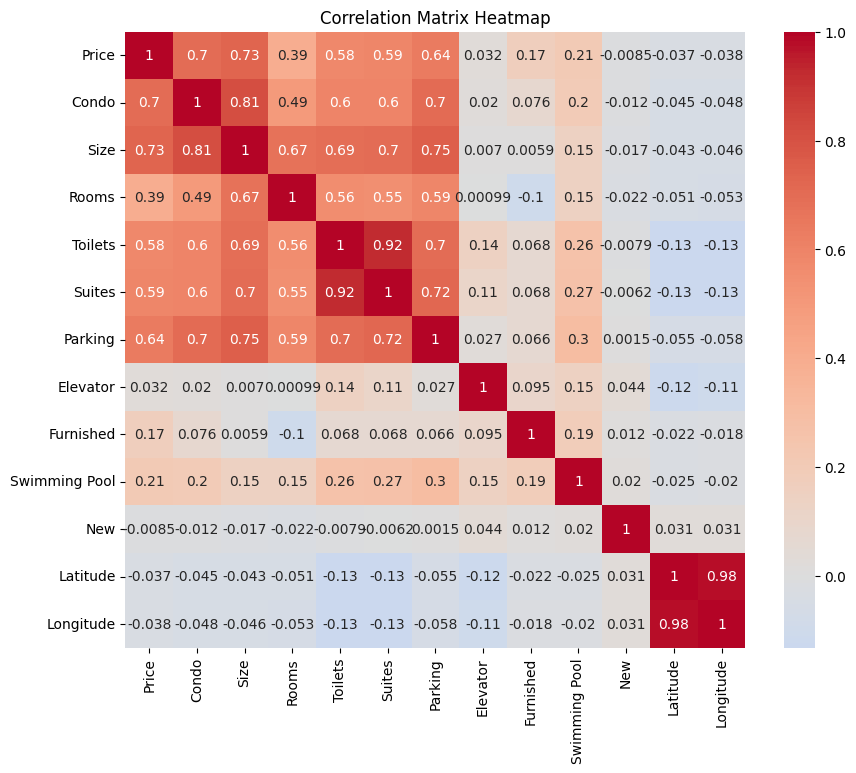

In [29]:
#Plotting correlation heatmap

numeric_only_df = df_rent.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_only_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data preparation for ML Models

In [30]:
import sklearn

In [34]:
#Removing useless information
df_cleaned = df_rent.drop(['New', 'Property Type', 'Negotiation Type'], axis=1)
df_cleaned

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,Brooklin/São Paulo,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,Brooklin/São Paulo,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,Brooklin/São Paulo,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,Brooklin/São Paulo,-23.612287,-46.681482


## Dealing with categorical data df_cleaned['District']

This kinds of data can be approached in two ways:

1- Orinal Encoder (not recomended due to number of classes)

2- One Hot Encoder

In [38]:
#Ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

district_encoded = ordinal_encoder.fit_transform(df_cleaned[['District']])
district_encoded
            

array([[3.],
       [3.],
       [3.],
       ...,
       [9.],
       [9.],
       [9.]])

In [40]:
#One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(df_cleaned[['District']])
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])